# Project Roadmap

### 1. Problem Statement
### 2. Setup / Import Libraries
### 3. Preprocessing
### 4. Exploratory Data Analysis
### 5. Model Development & Evaluation
### 6. Final Results

# 1. Project Objectives
### This project focuses on estimating car prices based on a dataset containing features such as engine specifications, dimensions, and safety ratings. The goal of this project is to develop a model that can accurately predict the price of different car types and identify the most significant variables for price prediction. The performance of each model will be evaluated using the standard R-squared (R²) metric to measure how well it explains the variability of the target variable.

# 2. Setup / Import Libraries

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder # препроцесинг для Многомерный полином (Multivariate Polynomial function)

# Эти 2 штуки нужны для pipelайнов
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# это для mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score 

# Module 5 - Refinement
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# libraries for plotting
%pip install micropip
import micropip
await micropip.install(['ipywidgets'], keep_going=True)
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual

# для Ridge Regression
from sklearn.linear_model import Ridge

# для Grid Search
from sklearn.model_selection import GridSearchCV

# Проверка мультиколинеарности с помощью VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

Note: you may need to restart the kernel to use updated packages.


# 3. Preprocessing

## 3.1 Load Data

In [107]:
df = pd.read_csv("C:/Main Folder/Data analysis/Datasets for practice/automobile.csv")
df

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,202,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## 3.2 Take a look at our data

In [108]:
df.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [109]:
df.shape

(205, 27)

In [110]:
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## 3.3 Clean / transform data

#### Drop the 'Unnamed: 0'. That makes no sense

In [111]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [112]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Handling missing and incorrect values

In [113]:
(df=='').sum().sum()

0

In [114]:
df.isnull().sum().sum()

0

In [115]:
(df == '?').sum().sum()

59

In [116]:
df.replace('?', np.NaN, inplace = True)

In [117]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### Drop entries where price is empty. We can't work with it 

In [118]:
df.dropna(subset = ['price'], axis = 0, inplace = True)

#### lets see what other columns with missing values represent

In [119]:
df[['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm']].head()

,normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm
0,NaN,two,3.47,2.68,111,5000
1,NaN,two,3.47,2.68,111,5000
2,NaN,two,2.68,3.47,154,5000
3,164,four,3.19,3.40,102,5500
4,164,four,3.19,3.40,115,5500


In [120]:
df[['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm']].dtypes

normalized-losses    object
num-of-doors         object
bore                 object
stroke               object
horsepower           object
peak-rpm             object
dtype: object

#### lets convert object types to float except num-of-doors 

In [121]:
df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']] = df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']].astype('float')

#### Now we can handle NaN values. We replace them with the mean

In [122]:
for n in df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']].columns:
    mean_n = df[n].mean()
    df[n] = df[n].fillna(mean_n)

#### 'num-of-doors' is a categorical data. Let’s take a closer look at it

In [123]:
df['num-of-doors'].value_counts()

num-of-doors
four    113
two      86
Name: count, dtype: int64

#### This column has only 2 unique values. We'll convert it to integers and fill missing values with the most frequent one

In [124]:
df['num-of-doors'].replace({'two' : 2, 'four' : 4}, inplace = True)

In [125]:
df['num-of-doors'].value_counts().idxmax() # 4 is a frequent one, replace with it

4.0

In [126]:
df['num-of-doors'] = df['num-of-doors'].fillna(4)

In [127]:
df['num-of-doors'].isnull().sum()

0

In [128]:
df.isnull().sum().sum() # isnull() is empty

0

### Let’s examine the data types to ensure everything is in order.

In [129]:
print('float types.', len(df.select_dtypes(include = ['float']).columns), 'columns: ', (df.select_dtypes(include = ['float']).columns).tolist())
print('int types:', len(df.select_dtypes(include = ['int']).columns), 'columns: ', (df.select_dtypes(include = ['int']).columns).tolist())
print('object types:', len(df.select_dtypes(include = ['object']).columns), 'columns: ', (df.select_dtypes(include = ['object']).columns).tolist())

float types. 11 columns:  ['normalized-losses', 'num-of-doors', 'wheel-base', 'length', 'width', 'height', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm']
int types: 5 columns:  ['symboling', 'curb-weight', 'engine-size', 'city-mpg', 'highway-mpg']
object types: 10 columns:  ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'price']


#### Convert 'price' column to integer

In [130]:
df['price'] = df['price'].astype('int')

### We can use only numeric values, so let's see what object data are and how to work with them

In [131]:
object_types = list(df.select_dtypes(include = ['object']).columns)
for n in object_types:
    print('Column name:', n, '\b. Number of Unique Values -> ', df[n].nunique(), '\n')

Column name: make. Number of Unique Values ->  22 

Column name: fuel-type. Number of Unique Values ->  2 

Column name: aspiration. Number of Unique Values ->  2 

Column name: body-style. Number of Unique Values ->  5 

Column name: drive-wheels. Number of Unique Values ->  3 

Column name: engine-location. Number of Unique Values ->  2 

Column name: engine-type. Number of Unique Values ->  6 

Column name: num-of-cylinders. Number of Unique Values ->  7 

Column name: fuel-system. Number of Unique Values ->  8 



### Deal with dummies except "make"

In [132]:
df_with_dummies = pd.get_dummies(df, columns=['fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'], drop_first=True)

In [133]:
df_with_dummies.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'fuel-type_gas', 'aspiration_turbo',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_rear', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'num-of-cylinders_five', 'num-of-cylinders_four',
       'num-of-cylinders_six', 'num-of-cylinders_three',
       'num-of-cylinders_twelve', 'num-of-cylinders_two', 'fuel-system_2bbl',
       'fuel-system_4bbl', 'fuel-system_idi', 'fuel-system_mfi',
       'fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi'],
      dtype='object')

In [134]:
df_with_dummies.shape[1]

45

# 4. Exploratory Data Analysis

## 4.1 Price Distribution (Histogram) 

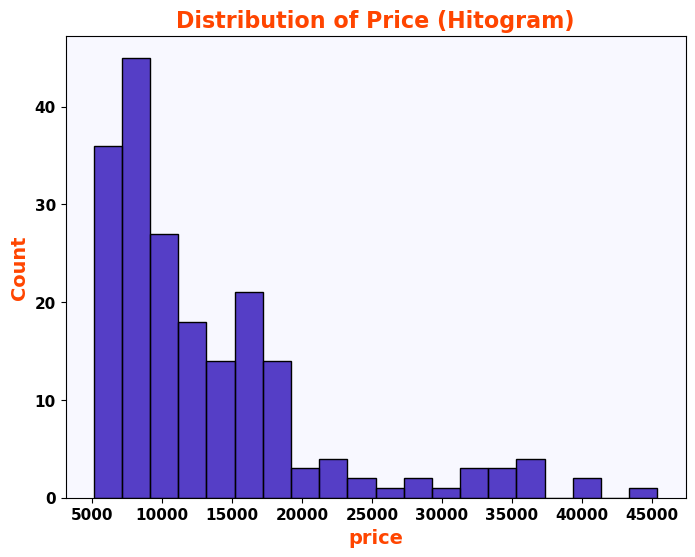

In [135]:
plt.figure(figsize=(8, 6))
ax2 = sns.histplot(data = df['price'], bins=20, kde=False, color = '#1f00b4', edgecolor = 'black')#, stat="density")

plt.xlabel('Price', fontsize = 16)
ax2.set_facecolor('#F8F8FF') 
plt.title('Distribution of Price (Hitogram)', fontsize = 16, fontweight='bold', color = '#ff4500')
plt.xlabel('price', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.ylabel('Count', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
plt.xticks(fontsize=11, fontweight='bold', color = 'black')

plt.show()

## 4.2 Price Distribution (Boxplot) 

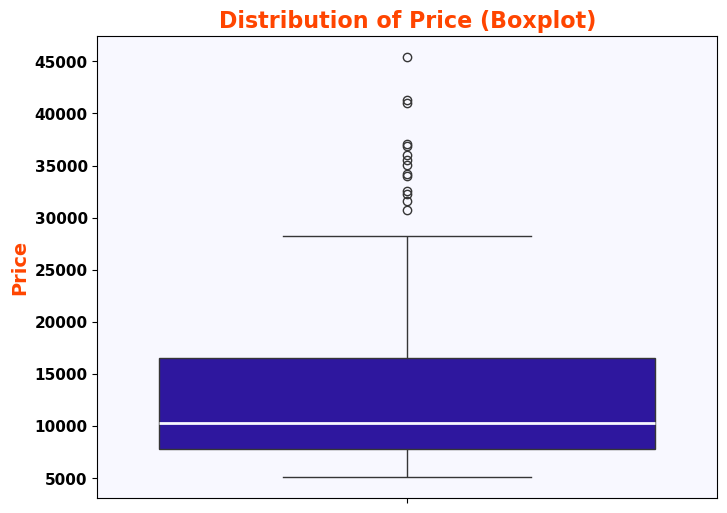

In [136]:
plt.figure(figsize=(8, 6))

ax = sns.boxplot(data = df, y = df['price'], color = '#1f00b4', medianprops={'color': '#F8F8FF', 'linewidth': 2, 'linestyle': '-'})
plt.title('Distribution of Price (Boxplot)', fontsize = 16, fontweight='bold', color = '#ff4500')
plt.ylabel('Price', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
ax.set_facecolor('#F8F8FF') 
plt.show()

## 4.3 Distribution of Numerical Features

In [137]:
numerical_features = list(df.select_dtypes(include = ['number']).columns)

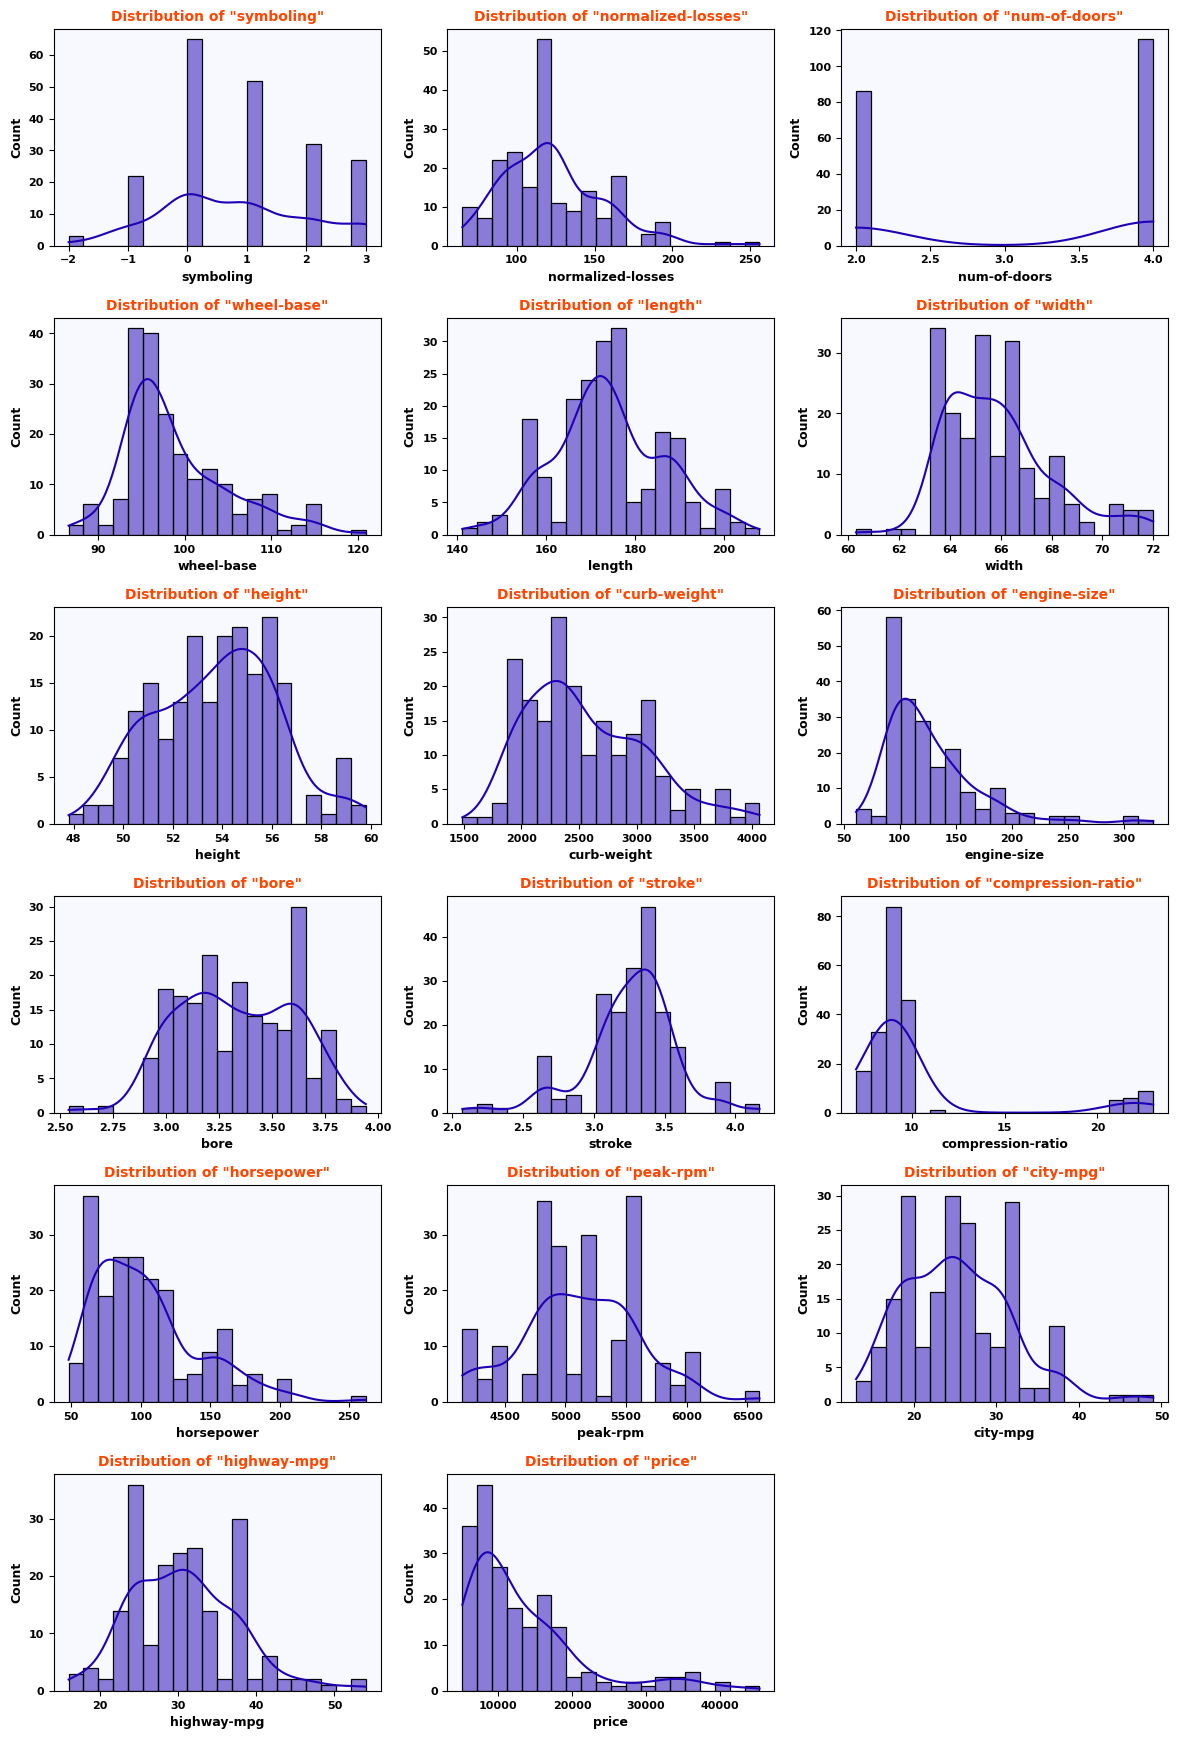

In [138]:
plt.figure(figsize=(12, 20))
for feature in numerical_features:
    plt.subplot(7, 3, numerical_features.index(feature) + 1)
    ax0 = sns.histplot(
        data=df[feature],
        bins=20, kde=True, 
        color = '#1f00b4', 
        edgecolor = 'black' 
    )
    
    plt.title(f'Distribution of "{feature}"', fontsize=10, fontweight='bold', color='#ff4500')
    plt.xlabel(feature, fontsize = 9, fontweight='bold', color = 'black')
    plt.ylabel('Count', fontsize = 9, fontweight='bold', color = 'black')
    plt.xticks(fontsize=8, fontweight='bold', color = 'black')
    plt.yticks(fontsize=8, fontweight='bold', color = 'black')
    ax0.set_facecolor('#F8F8FF') 
plt.tight_layout()
plt.show()

## 4.4 Distribution of Categorical Columns

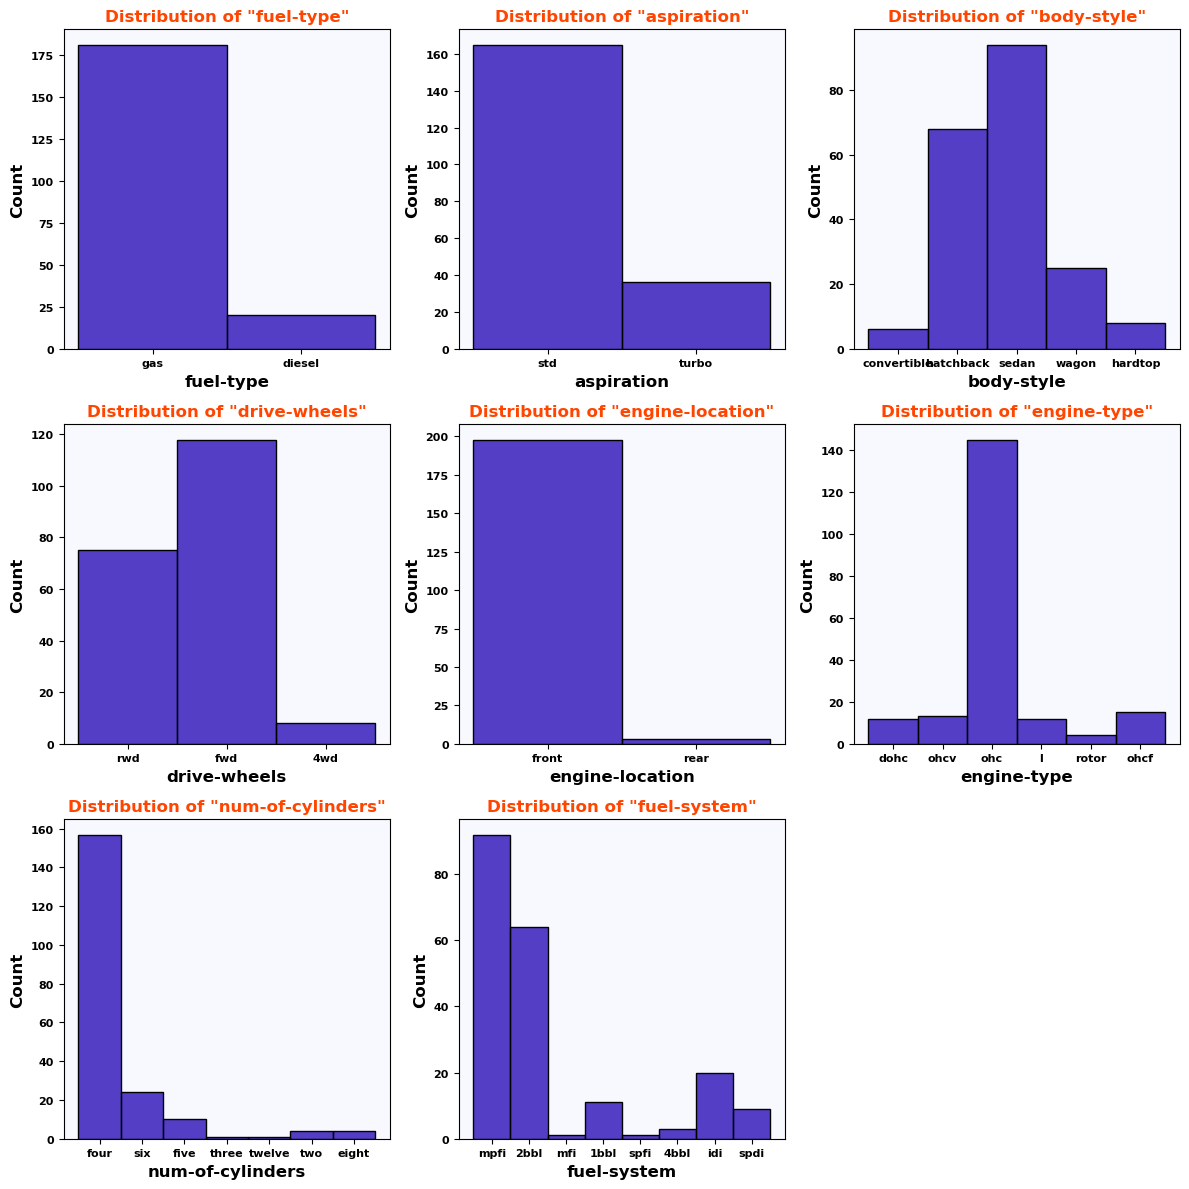

In [139]:
categorical_columns = list(df.select_dtypes(include=['object']).columns.drop('make'))
plt.figure(figsize=(12, 12))
for column in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(column) + 1)
    ax3 = sns.histplot(data=df[column], bins=20, kde=False, color = '#1f00b4', edgecolor = 'black')
    plt.title(f'Distribution of "{column}"', fontsize=12, fontweight='bold', color='#ff4500')
    plt.xlabel(column, fontsize = 12, fontweight='bold', color = 'black')
    plt.ylabel('Count', fontsize = 12, fontweight='bold', color = 'black')
    plt.xticks(fontsize=8, fontweight='bold', color = 'black')
    plt.yticks(fontsize=8, fontweight='bold', color = 'black')
    ax3.set_facecolor('#F8F8FF')
plt.tight_layout()
plt.show()

## 4.5 Distribution of Car makes

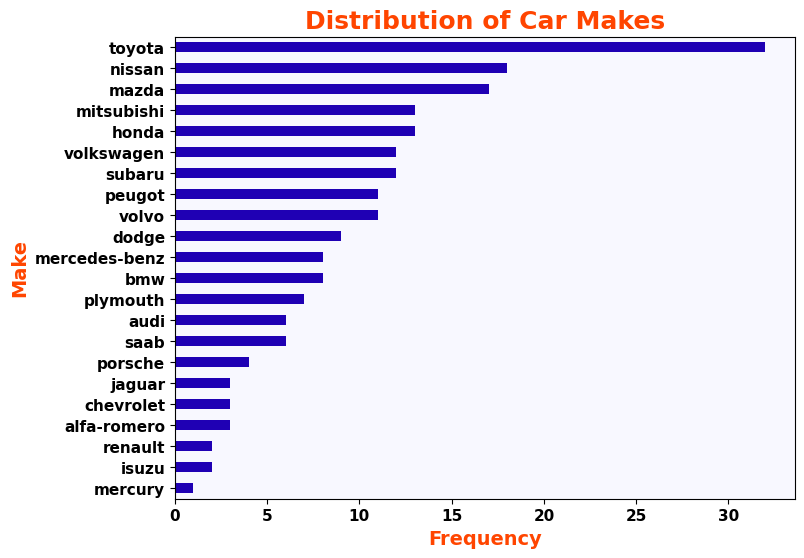

In [140]:
top_car_models = df['make'].value_counts()

plt.figure(figsize=(8, 6))
#plt.figure(facecolor='w')
ax = top_car_models.sort_values(ascending=True).plot(kind = 'barh', color = '#1f00b4')
ax.set_facecolor('#F8F8FF') 
plt.title('Distribution of Car Makes', fontsize = 18, fontweight='bold', color = '#ff4500')
plt.xlabel('Frequency', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.ylabel('Make', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
plt.xticks(fontsize=11, fontweight='bold', color = 'black')
plt.show()

## 4.6 Average Price By Car Make

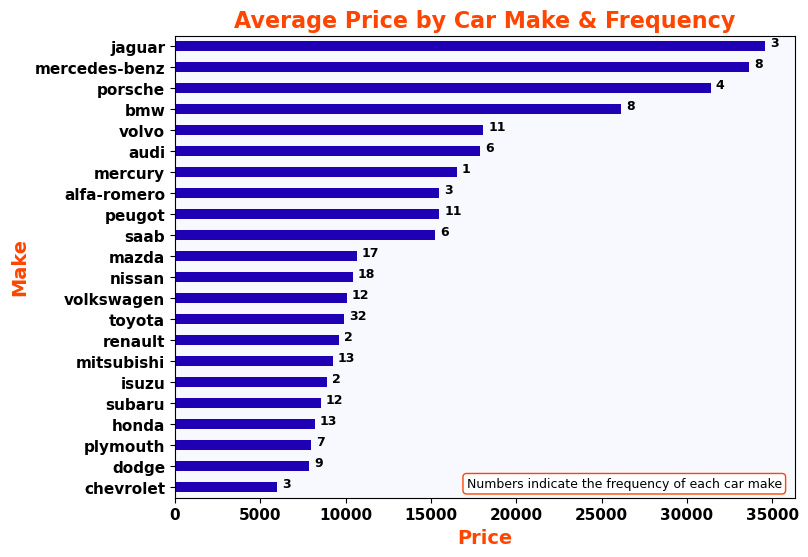

In [141]:
from matplotlib.lines import Line2D

df_group_makes_price = df.groupby('make')['price'].mean().sort_values(ascending = True)

plt.figure(figsize=(8, 6))

ax1 = df_group_makes_price.plot(kind = 'barh', color = '#1f00b4')
plt.title('Average Price by Car Make & Frequency', fontsize = 16, fontweight='bold', color = '#ff4500')
plt.xlabel('Price', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.ylabel('Make', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
plt.xticks(fontsize=11, fontweight='bold', color = 'black')
ax1.set_facecolor('#F8F8FF') 
for i, make in enumerate(df_group_makes_price.index):
    frequency = top_car_models[make]
    ax1.text(df_group_makes_price[i] + 300, i, frequency, fontsize = 9, fontweight='bold')

plt.text(17100, 0, 'Numbers indicate the frequency of each car make', fontsize = 9, bbox=dict(facecolor='white', edgecolor='#ff4500', boxstyle='round,pad=0.3')) 
plt.show()

## 4.7 Categorical Features and Price

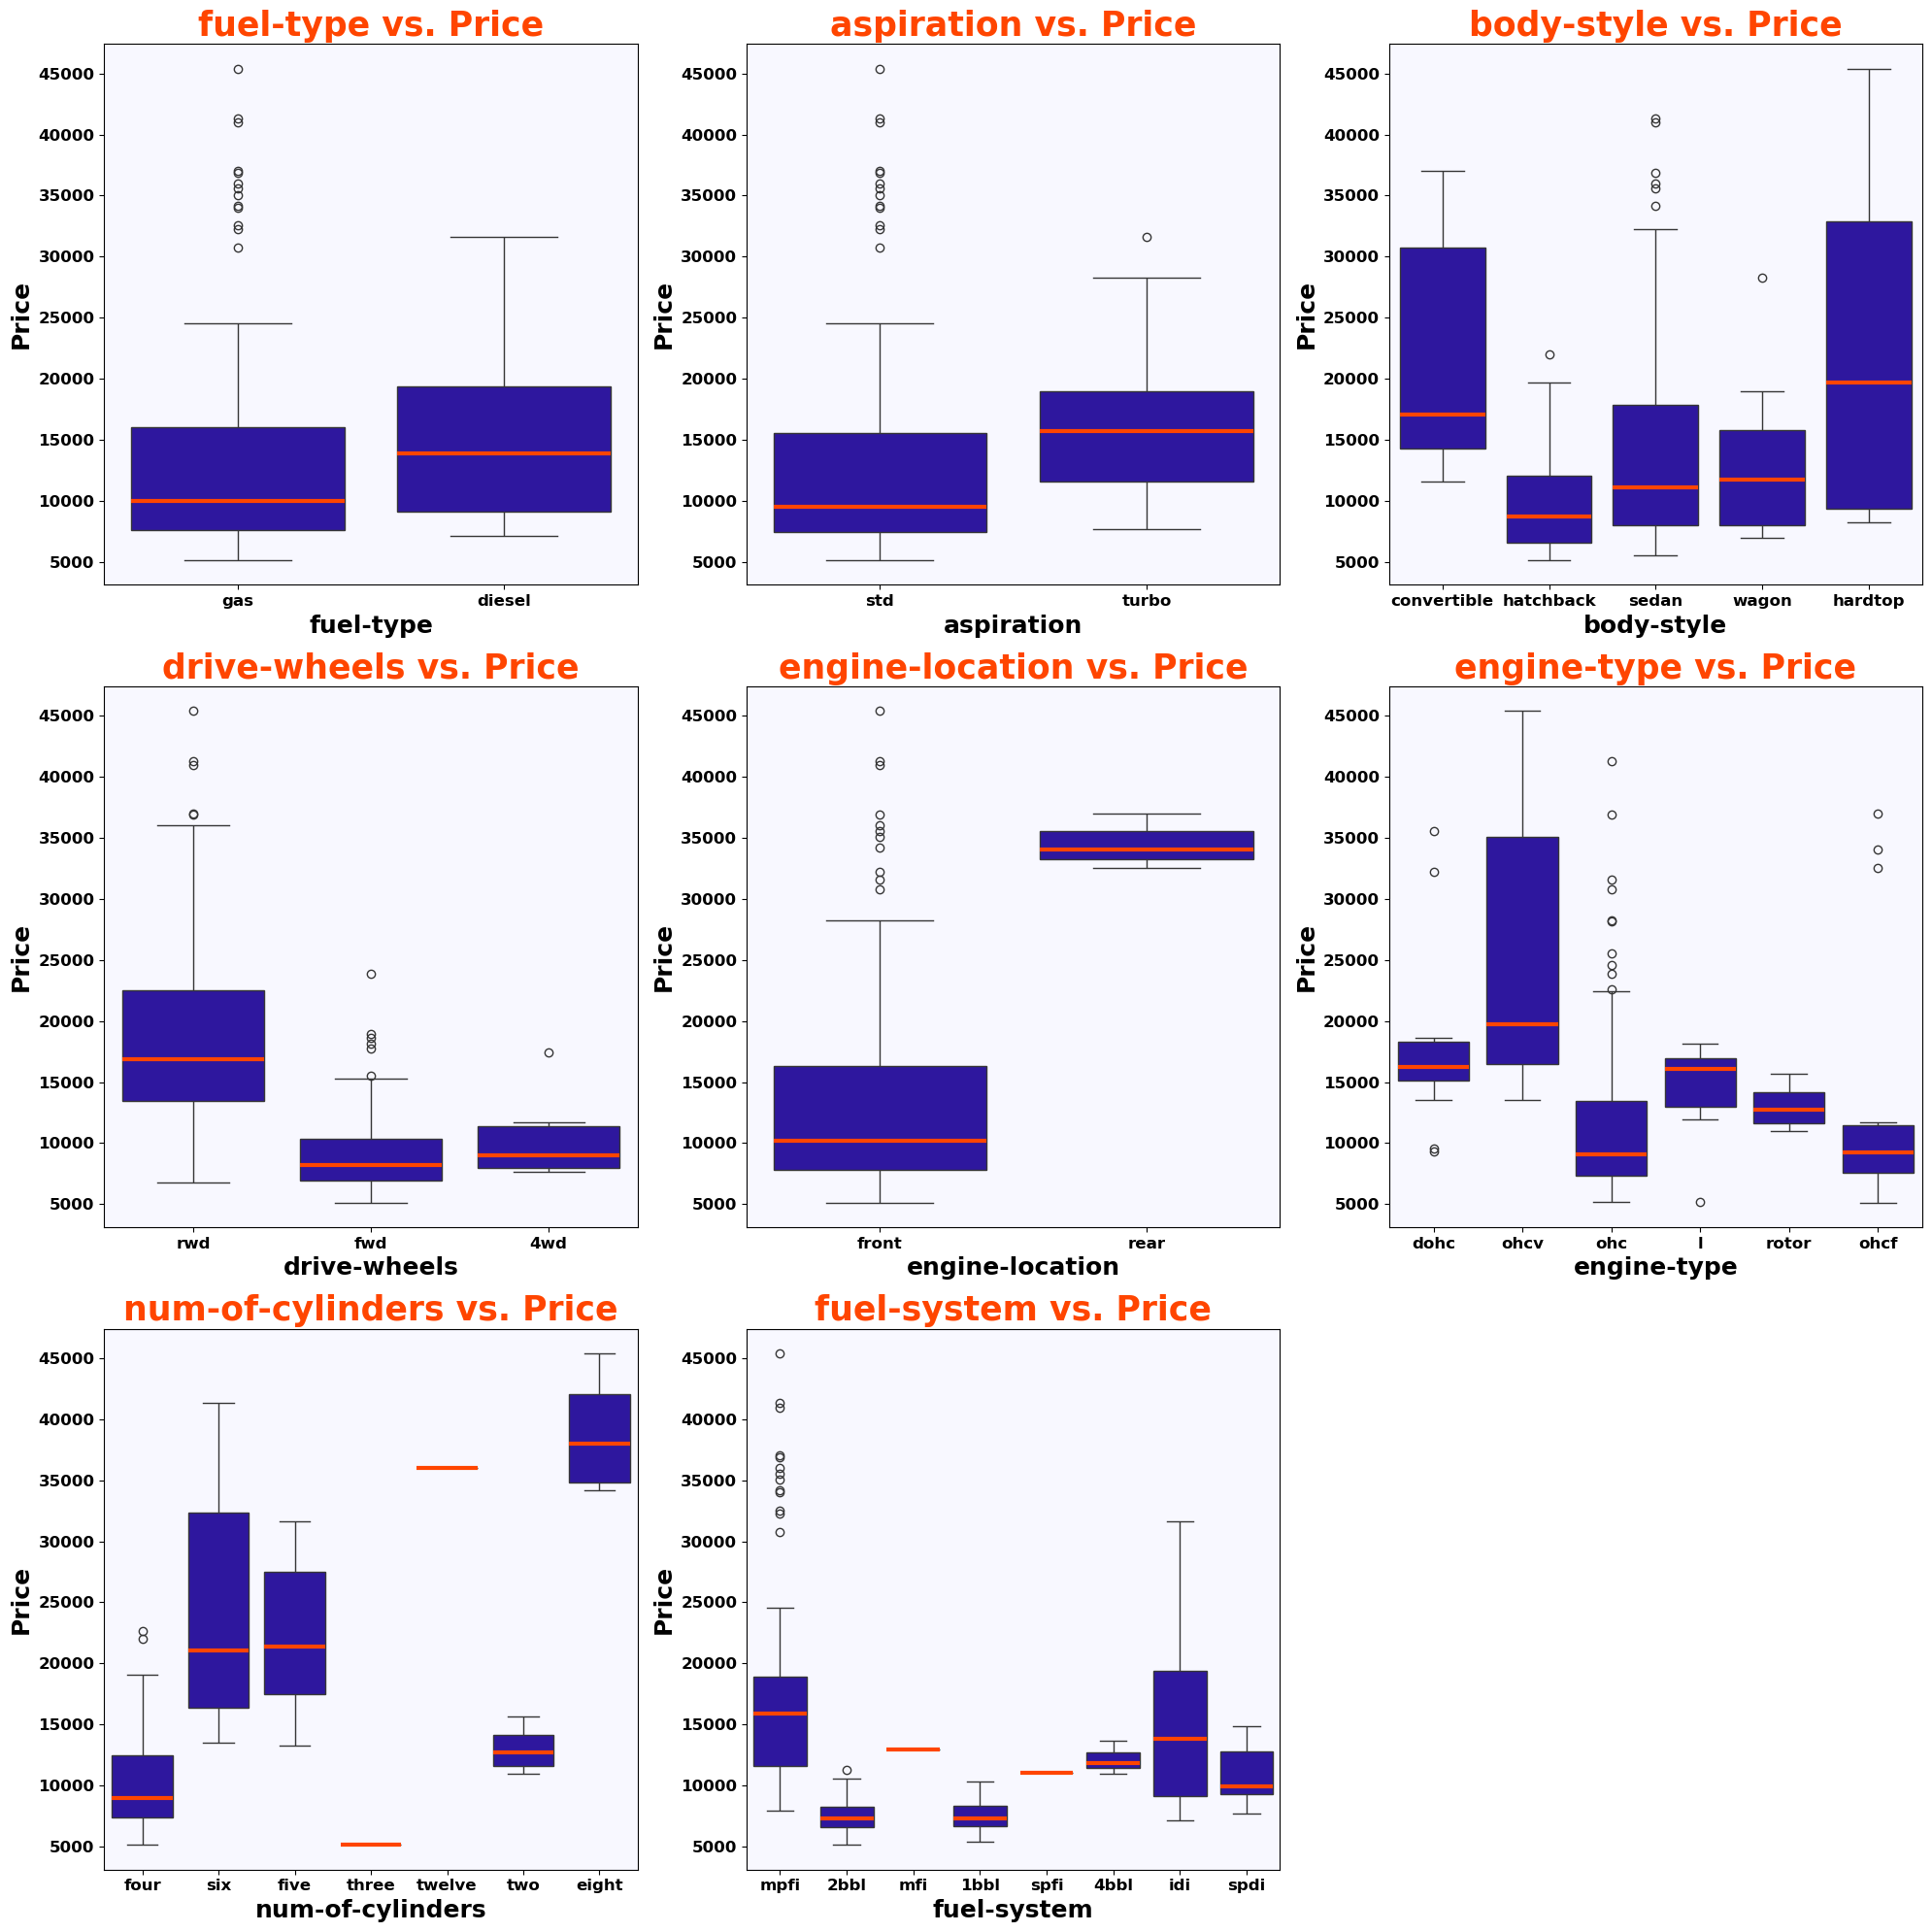

In [142]:
plt.figure(figsize=(20, 20))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    ax4 = sns.boxplot(data=df, x=feature, y='price', color = '#1f00b4', medianprops={'color': '#ff4500', 'linewidth': 3, 'linestyle': '-'})
    ax4.set_facecolor('#F8F8FF') 
    plt.title(f'{feature} vs. Price', fontsize = 25, fontweight='bold', color = '#ff4500')
    plt.xlabel(feature, fontsize = 18, fontweight='bold', color = 'black')
    plt.ylabel('Price', fontsize = 18, fontweight='bold', color = 'black')
    plt.yticks(fontsize=12, fontweight='bold', color = 'black')
    plt.xticks(fontsize=12, fontweight='bold', color = 'black')
plt.tight_layout()
plt.show()

## 4.8 Correlation Analysis

### 4.8.1 Correlation Analysis for numerical features

In [143]:
corr_df = df.select_dtypes(include='number').corr()

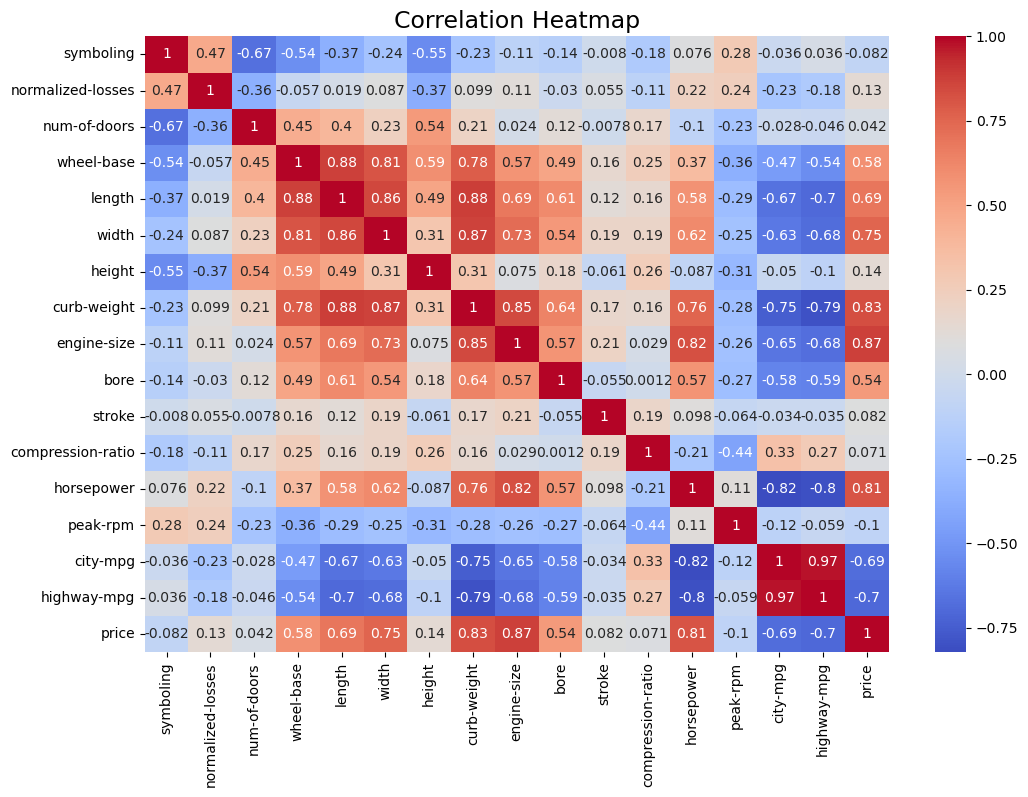

In [176]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=17, fontweight='normal', color = 'black')
plt.show()

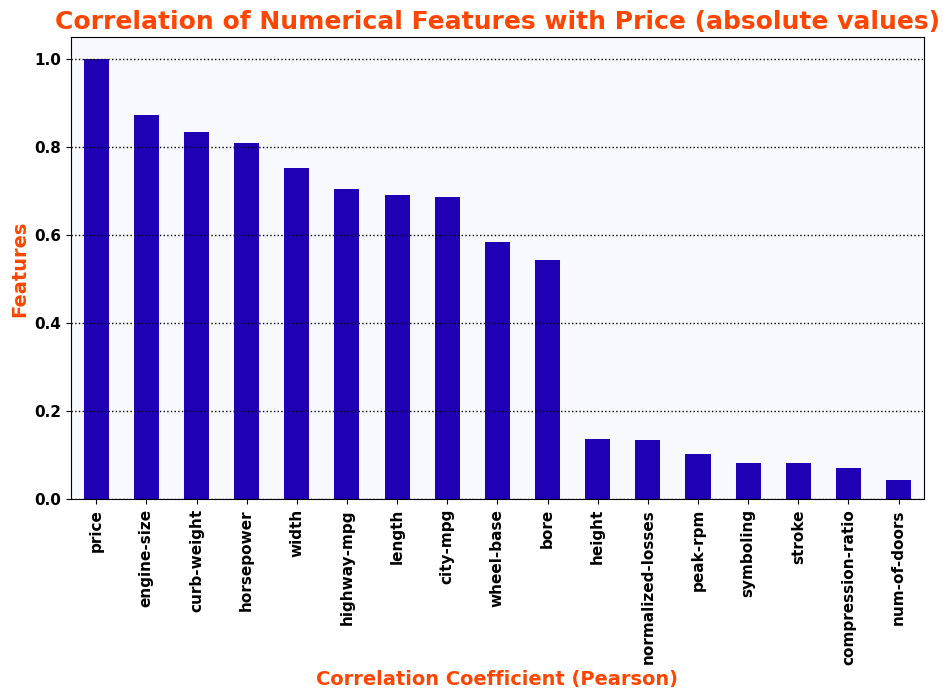

In [145]:
plt.figure(figsize = (8, 6))

ax5 = abs(corr_df['price']).sort_values(ascending = False).plot(kind = 'bar', color = '#1f00b4', figsize=(11, 6))

ax5.grid(True, axis='y', linewidth=1, linestyle=':', color = 'black')
plt.title('Correlation of Numerical Features with Price (absolute values)', fontsize = 18, fontweight = 'bold', color = '#ff4500')
plt.xlabel('Correlation Coefficient (Pearson)', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.ylabel('Features', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
plt.xticks(fontsize=11, fontweight='bold', color = 'black')
ax5.set_facecolor('#F8F8FF') 
plt.show()

### 4.8.2 Correlation Analysis for categorical features

In [146]:
df_dummies_and_price = df_with_dummies.select_dtypes(include = 'bool')
df_dummies_and_price['price'] = df['price']
dummies_corr = df_dummies_and_price.corr()

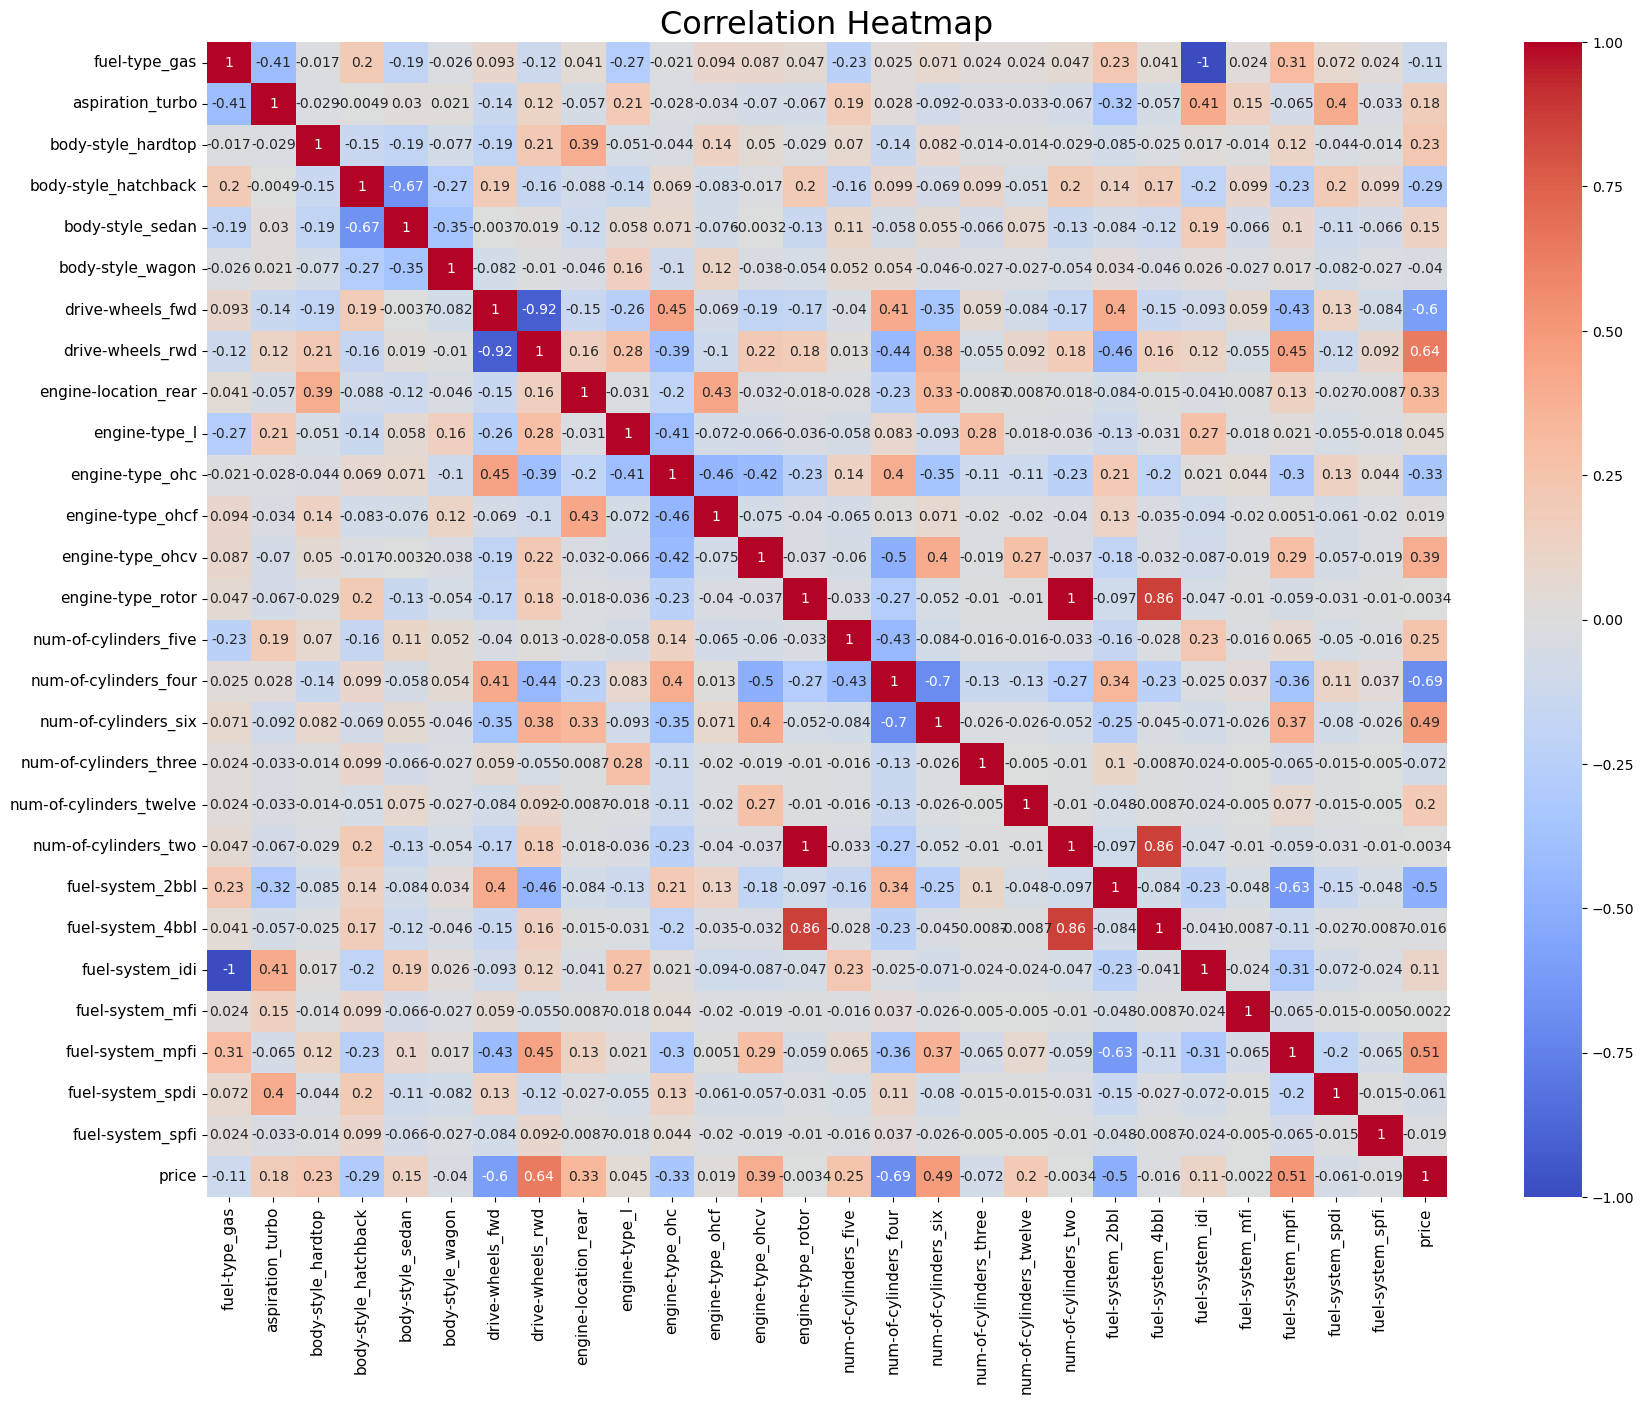

In [174]:
plt.figure(figsize = (20,15))
ax8 = sns.heatmap(dummies_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=23, fontweight='normal', color = 'black')
#plt.xlabel('Correlation Coefficient (Pearson)', fontsize = 14, fontweight='bold', color = '#ff4500')
#plt.ylabel('Features', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.yticks(fontsize=11, fontweight='normal', color = 'black')
plt.xticks(fontsize=11, fontweight='normal', color = 'black')
ax8.set_facecolor('#F8F8FF') 
plt.show()

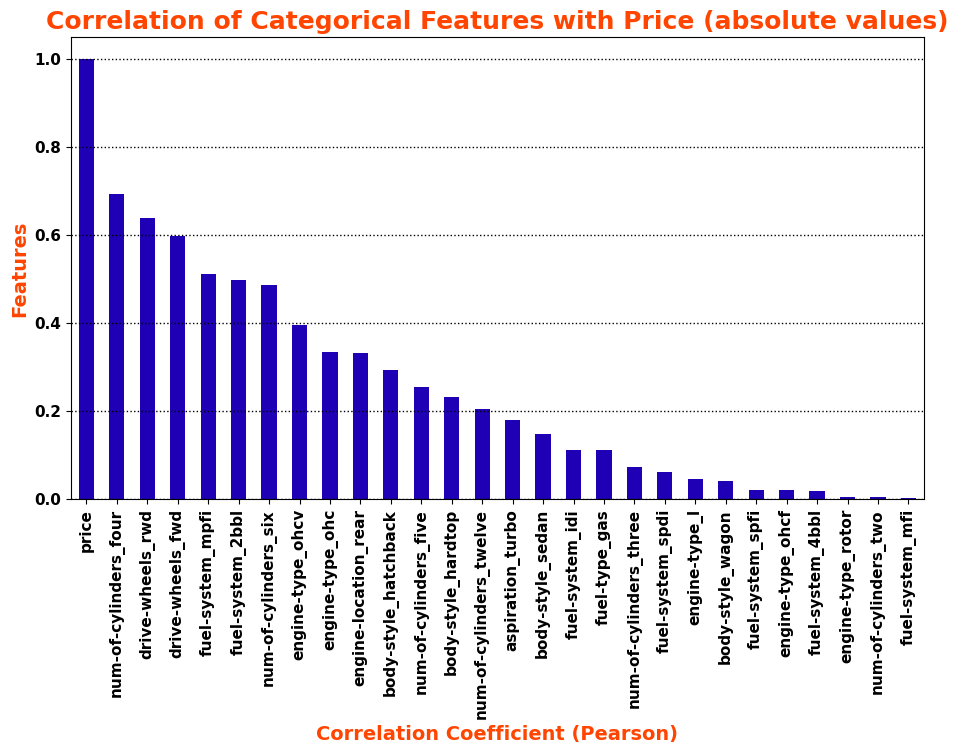

In [148]:
plt.figure(figsize = (8, 6))

ax9 = abs(dummies_corr['price']).sort_values(ascending = False).plot(kind = 'bar', color = '#1f00b4', figsize=(11, 6))

ax9.grid(True, axis='y', linewidth=1, linestyle=':', color = 'black')
plt.title('Correlation of Categorical Features with Price (absolute values)', fontsize = 18, fontweight = 'bold', color = '#ff4500')
plt.xlabel('Correlation Coefficient (Pearson)', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.ylabel('Features', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
plt.xticks(fontsize=11, fontweight='bold', color = 'black')
ax5.set_facecolor('#F8F8FF') 
plt.show()

## 4.9 Analysis Results For Future Predictions

#### 1. Looking at the plots in section 4.7, we can clearly see significant correlation patterns between categorical variables and price. We need to prepare this data for future models.
#### 2. Figure 4.6 clearly shows that the 'make' has an effect on price. But we have too many makes and so few instances for each of them, and the 'make' feature appears to be highly multicollinear with other variables. So it will not be used as a predictor.
#### 3. The highest correlation coefficients  within numerical data are observed for: engine-size, curb-weight, horsepower, width and highway-mpg.
#### 4. The highest correlation coefficients  within categorical data are observed for: num-of-cylinders, drive-wheels_rwd, drive-wheels_fwd, fuel-system_mpfi and fuel-system_2bbl.
#### 5. There is a sharp drop after the variable bore in Correlation of numerical features with "Price" (Figure 4.8). After the bore feature, the Pearson correlation coefficient decreases from 0.55 to 0.15.

# 5. Model Development & Evaluation

## 5.1 Linear Regression with the highest correlation coefficient features

In [149]:
z = df[['engine-size', 'curb-weight', 'horsepower', 'width', 'highway-mpg', 'length', 'city-mpg', 'wheel-base', 'bore']]
y = df['price']

In [190]:
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size = 0.2, random_state = 1)

In [191]:
lm = LinearRegression()

In [192]:
lm.fit(x_train, y_train)

LinearRegression()

In [222]:
y_pred_test = lm.predict(x_test)
y_pred_test[0:5]

array([11715.72395672,  6462.11240118, 11632.85855257,  6790.73067828,
       15714.61682277])

In [223]:
print(lm.score(x_test, y_test))
print(lm.score(x_train, y_train))

0.7493041049104121
0.8272446741357274


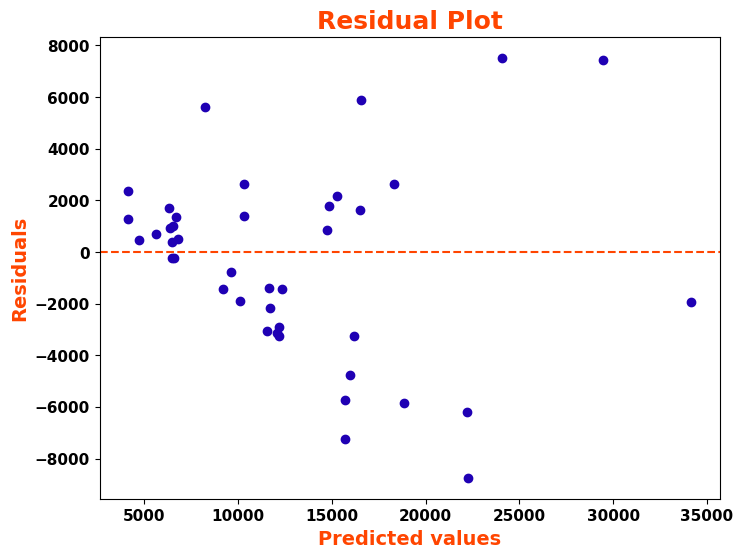

In [224]:
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 6))

ax6 = plt.scatter(y_pred_test, residuals, color = '#1f00b4')
plt.title('Residual Plot', fontsize = 18, fontweight='bold', color = '#ff4500')
plt.axhline(y=0, color='#ff4500', linestyle='--')
plt.xlabel('Predicted values', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.ylabel('Residuals', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
plt.xticks(fontsize=11, fontweight='bold', color = 'black')
ax6.set_facecolor('#1f00b4') 
plt.show()

## Inferences
### R^2 = 0.749 for test and 0.827 for train.
### There is no clear pattern visible on Residual Plot. So linear regression is a good choise

## 5.2 Linear Regression with all numerical features

In [196]:
z1 = df.select_dtypes(include = 'number').drop('price', axis = 1)
y1 = df['price']

In [197]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(z1, y1, test_size = 0.2, random_state = 1)

In [198]:
lm1 = LinearRegression()

In [199]:
lm1.fit(x_train1, y_train1)

LinearRegression()

In [200]:
print(lm1.score(x_test1, y_test1))
print(lm1.score(x_train1, y_train1))

0.7802424860782048
0.8592854491937665


In [220]:
y_pred_test1 = lm1.predict(x_test1)
y_pred_test1[0:5]

array([10575.10143789,  6551.18703709,  9974.04270384,  9361.76152293,
       14154.81438497])

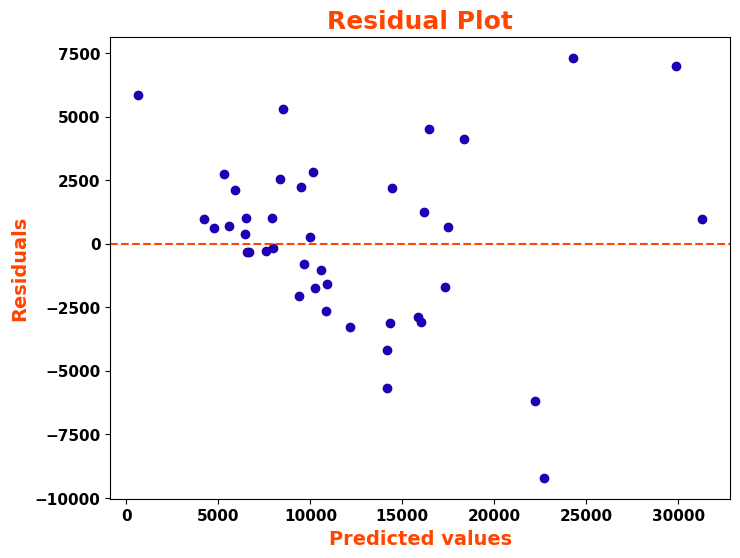

In [221]:
residuals1 = y_test1 - y_pred_test1
plt.figure(figsize=(8, 6))

ax6 = plt.scatter(y_pred_test1, residuals1, color = '#1f00b4')
plt.title('Residual Plot', fontsize = 18, fontweight='bold', color = '#ff4500')
plt.axhline(y=0, color='#ff4500', linestyle='--')
plt.xlabel('Predicted values', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.ylabel('Residuals', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
plt.xticks(fontsize=11, fontweight='bold', color = 'black')
ax6.set_facecolor('#1f00b4') 
plt.show()

## Inferences
### R^2 = 0.78 for test and 0.859 for train data. The results slightly improved.
### Residual Plot is still good for linear regression choise

## 5.3 Linear Regression with all numerical features and categorical features

In [204]:
z2 = df_with_dummies.drop(['price', 'make'], axis = 1)
y2 = df['price']

In [205]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(z2, y2, test_size = 0.2, random_state = 1)

In [206]:
lm2 = LinearRegression()

In [207]:
lm2.fit(x_train2, y_train2)

LinearRegression()

In [208]:
print(lm2.score(x_test2, y_test2))
print(lm2.score(x_train2, y_train2))

0.8695708291733311
0.9475092137660478


In [218]:
y_pred_test2 = lm2.predict(x_test2)
y_pred_test2[0:5]

array([10739.52058943,  6244.59839584, 10987.9695273 ,  6573.21482617,
       12942.46410224])

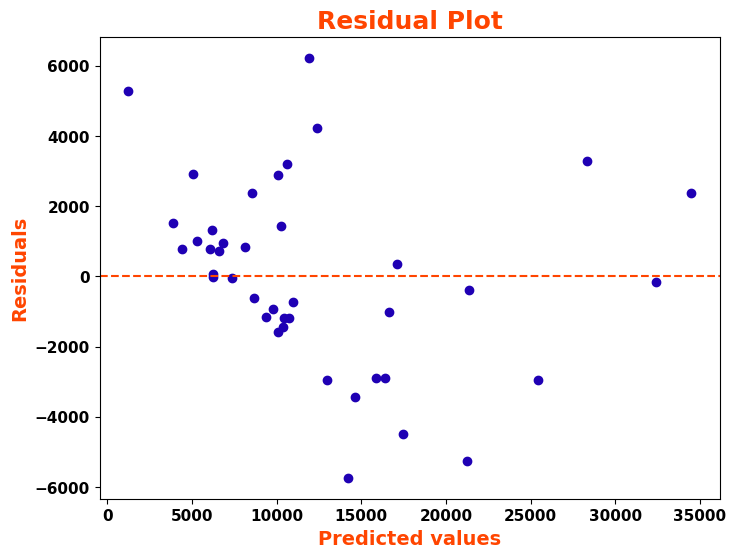

In [219]:
residuals2 = y_test2 - y_pred_test2
plt.figure(figsize=(8, 6))

ax6 = plt.scatter(y_pred_test2, residuals2, color = '#1f00b4')
plt.title('Residual Plot', fontsize = 18, fontweight='bold', color = '#ff4500')
plt.axhline(y=0, color='#ff4500', linestyle='--')
plt.xlabel('Predicted values', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.ylabel('Residuals', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
plt.xticks(fontsize=11, fontweight='bold', color = 'black')
ax6.set_facecolor('#1f00b4') 
plt.show()

## Inferences
### R^2 is 0.869 for test and 0.947 for train data. The results improved again.
### Residual Plot is good as well

## 5.4. Polynomial Regression with the optimal degree

In [213]:
z3 = df.select_dtypes(include = 'number').drop('price', axis = 1)
y3 = df['price']

In [214]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(z1, y1, test_size = 0.2, random_state = 1)

Order  1   0.7802424860782058  
Order  2   -1114334.3463560261  
Order  3   -156.97747484326507  
Order  4   -321.3809684029215  
Order  5   -175.7056426428365  


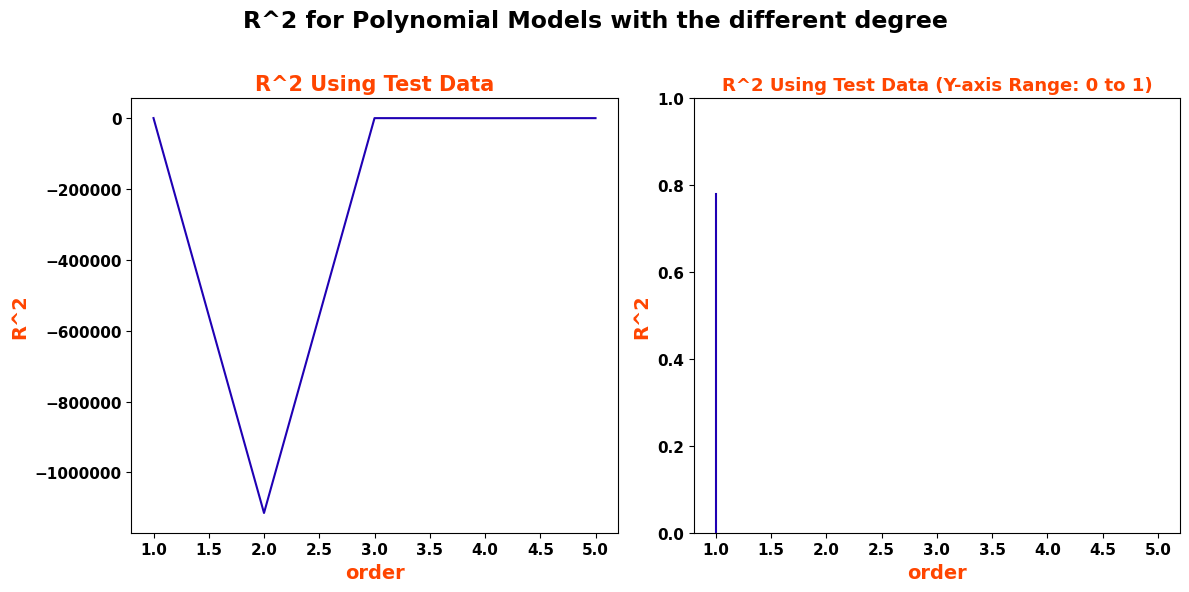

In [215]:
Rsqu_test = []

order = [1, 2, 3, 4, 5]

for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train3)
    x_test_pr = pr.transform(x_test3)
    lm3 = LinearRegression()
    lm3.fit(x_train_pr, y_train3)
    Rsqu_test.append(lm3.score(x_test_pr, y_test3))
    print("Order ", n, " ", lm3.score(x_test_pr, y_test3), " ")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax7 = plt.plot(order, Rsqu_test, color = '#1f00b4')
plt.xlabel('order', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.ylabel('R^2', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.title('R^2 Using Test Data', fontsize = 15, fontweight='bold', color = '#ff4500')
plt.ticklabel_format(style='plain', axis='y')  # отключаем 1e6
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
plt.xticks(fontsize=11, fontweight='bold', color = 'black')

plt.subplot(1, 2, 2)
ax7 = plt.plot(order, Rsqu_test, color = '#1f00b4')
plt.xlabel('order', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.ylabel('R^2', fontsize = 14, fontweight='bold', color = '#ff4500')
plt.title('R^2 Using Test Data (Y-axis Range: 0 to 1)', fontsize = 13, fontweight='bold', color = '#ff4500')
plt.ticklabel_format(style='plain', axis='y')  # отключаем 1e6
plt.yticks(fontsize=11, fontweight='bold', color = 'black')
plt.xticks(fontsize=11, fontweight='bold', color = 'black')
plt.ylim(0, 1)

plt.suptitle("R^2 for Polynomial Models with the different degree", fontsize=17, fontweight='bold', color='black')
plt.tight_layout(rect=[0, 0, 1, 0.96])  #

plt.show()
plt.close()

## Inference
### Overfitting starts already at the 2nd degree — just as expected

# 6. Final Results

### We have 4 models with different levels of accuracy. The most accurate is the linear model that uses the largest number of features and includes categorical data. The Coefficient of determination is 0.869, thus our model explains 86.9% of price changes on unseen (test) data. That is a solid result, considering we have 205 entries in our dataset.

In [236]:
final_prediction = pd.DataFrame({'Actual Value' : y_test2, 'Predicted Value' : y_pred_test2, 'Difference' : y_test2 - y_pred_test2})
final_prediction.index.name = 'Entry index'
final_prediction

,Actual Value,Predicted Value,Difference
Entry index,,,
100,9549,10739.520589,-1190.520589
120,6229,6244.598396,-15.598396
62,10245,10987.969527,-742.969527
36,7295,6573.214826,721.785174
169,9989,12942.464102,-2953.464102
151,6338,6266.172142,71.827858
29,12964,15875.599615,-2911.599615
81,8499,10091.829803,-1592.829803
4,17450,17106.716858,343.283142


### The most significant variables for predicting car prices are engine size, curb weight, horsepower, width, highway MPG and number of cylinders. These features have the greatest correlation coefficient with the price variable
